Performing Exploratory Data Analysis on the General Company File

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
general_df = pd.read_excel('general_industries_df_case_competition_scrambled_train.xlsx', sheet_name='Data')

In [4]:
general_df.head()

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,...,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
0,28464,2,4,2017Q1,8228,8,1,365604.767017,341575.264490,368053.254720,...,373864.705143,369694.522194,339867.222381,364236.569625,NaN,NaN,350599.333501,368971.137940,342125.692144,360512.171013
1,39693,3,63,2018Q4,12315,7,1,748378.874160,593272.587785,606298.959960,...,605658.829652,510342.796894,705321.337524,577814.590748,464235.132963,617901.795410,551960.406798,460369.335404,391812.102849,416234.858630
2,19535,15,13,2018Q2,5504,6,1,379351.685119,394182.092405,380051.883962,...,372940.581700,356833.167530,367306.071112,387950.807778,389893.413929,364549.242197,370680.802471,371698.484955,362778.394801,366921.505401
3,4286,2,4,2020Q1,1107,8,1,363552.396086,371786.373645,371542.067484,...,356411.077910,342327.527537,366354.742233,372030.051844,374857.163137,362254.021673,366611.785072,344896.040064,367964.677168,350629.253166
4,39621,59,30,2019Q2,12294,8,1,368530.936855,367450.033454,358297.870364,...,355608.575949,351911.163051,NaN,NaN,NaN,NaN,350505.223417,347030.412041,360238.097158,NaN


In [5]:
general_df = general_df.sort_values(by = ['ROW'], ascending=False)

In [6]:
for i in range(general_df.shape[1]):
    n_miss = general_df.iloc[:, [i]].isnull().sum()
    perc = n_miss / general_df.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (general_df.columns[i], n_miss, perc))

> ROW, Missing: 0 (0.0%)
> Corp_Residence_Country_Code, Missing: 0 (0.0%)
> BR Code, Missing: 0 (0.0%)
> Period, Missing: 0 (0.0%)
> CUSTOMER_ID, Missing: 0 (0.0%)
> Final_IG, Missing: 0 (0.0%)
> B_PLUS_FLAG, Missing: 0 (0.0%)
> EBITDA_Y0, Missing: 0 (0.0%)
> EBITDA_Y1, Missing: 2090 (7.3%)
> EBITDA_Y2, Missing: 6664 (23.4%)
> EBITDA_Y3, Missing: 11591 (40.7%)
> TOTALASSET_Y0, Missing: 14 (0.0%)
> TOTALASSET_Y1, Missing: 2095 (7.4%)
> TOTALASSET_Y2, Missing: 6719 (23.6%)
> TOTALASSET_Y3, Missing: 11634 (40.9%)
> TOTALDEBT_Y0, Missing: 328 (1.2%)
> TOTALDEBT_Y1, Missing: 2330 (8.2%)
> TOTALDEBT_Y2, Missing: 6809 (23.9%)
> TOTALDEBT_Y3, Missing: 11696 (41.1%)
> TOTALREVENUE_Y0, Missing: 513 (1.8%)
> TOTALREVENUE_Y1, Missing: 2478 (8.7%)
> TOTALREVENUE_Y2, Missing: 6910 (24.3%)
> TOTALREVENUE_Y3, Missing: 11776 (41.4%)
> CURRENTASSET_Y0, Missing: 27 (0.1%)
> CURRENTASSET_Y1, Missing: 2089 (7.3%)
> CURRENTASSET_Y2, Missing: 6667 (23.4%)
> CURRENTASSET_Y3, Missing: 11580 (40.7%)
> FIXEDASSE

In [7]:
#non-financial-features
non_fin_features = ['ROW', 'Corp_Residence_Country_Code', 'BR Code', 'Period', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG']
#financial-features
fin_features = np.sort(list(set(general_df.columns) - set(non_fin_features)))

In [8]:
#Calculating 3 year average
def three_year_average(X, col_y0, col_y1, col_y2, col):
    X.drop(X[X[col_y0].isnull()].index, inplace = True)
    
    X[col] = X[col_y0]
    
    two_years_average = X[col_y1].notnull() & X[col_y2].isnull()
    X.loc[two_years_average, col] = X.loc[two_years_average, col_y0] * 4/7 + X.loc[two_years_average, col_y1] * 3/7
    
    three_years_average = X[col_y1].notnull() & X[col_y2].notnull()
    X.loc[three_years_average, col] = X.loc[three_years_average, col_y0] * 4/9 + X.loc[three_years_average, col_y1] * 3/9 + X.loc[three_years_average, col_y2] * 2/9
    
    return X

cols_to_avg = []

for col in fin_features:
    if (col.endswith('Y0') and not col.endswith('growth_Y0')):
        cols_to_avg.append([col, col[:-2] + 'Y1', col[:-2] + 'Y2', col[:-2] + '3YearAverage'])

data_left = general_df.copy()
for col0, col1, col2, col in cols_to_avg:
    orig_num_data = len(data_left)
    data_left = three_year_average(data_left, col0, col1, col2, col)
    remaining_data = len(data_left)
    print((orig_num_data - remaining_data), 'data records are dropped due to ' + col + '\n')

430 data records are dropped due to ARTurnover_3YearAverage

115 data records are dropped due to ASSETTURNOVER_3YearAverage

4 data records are dropped due to CAPITALIZATION_3YearAverage

75 data records are dropped due to CCE_3YearAverage

0 data records are dropped due to CURRENTASSET_3YearAverage

0 data records are dropped due to CURRENTLIABILITY_3YearAverage

2533 data records are dropped due to Capex2Dep_3YearAverage

0 data records are dropped due to DEBTSERVCOV_3YearAverage

0 data records are dropped due to EBITDAR_3YearAverage

0 data records are dropped due to EBITDA_3YearAverage

2471 data records are dropped due to FCF_3YearAverage

0 data records are dropped due to FIXEDASSET_3YearAverage

0 data records are dropped due to FIXEDCHARGECOV_3YearAverage

873 data records are dropped due to INVENTORYDAYS_3YearAverage

0 data records are dropped due to INVENTORY_3YearAverage

0 data records are dropped due to LEASERENTEXP_3YearAverage

0 data records are dropped due to NETPROF

In [9]:
data_left = data_left.reset_index(drop = True)

In [10]:
#Calculating financial ratios
for i in range(4):
    data_left['DEBT2EBITDA_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['EBITDA_Y' + str(i)]
    data_left['DEBT2CAPT_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['CAPITALIZATION_Y' + str(i)]
    data_left['DEBT2EQUITY_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['TOTALEQUITY_Y' + str(i)]
    data_left['DEBT2ASSET_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['TOTALASSET_Y' + str(i)]
    data_left['DEBT2TANGIBLENW_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['tangibleNetWorth_Y' + str(i)]
    data_left['CASH2ASSET_Y'+str(i)] = data_left['CCE_Y'+str(i)] / data_left['TOTALASSET_Y' + str(i)]
    data_left['CASH2DEBT_Y'+str(i)] = data_left['CCE_Y'+str(i)] / data_left['TOTALDEBT_Y' + str(i)]
    data_left['CA2CL_Y'+str(i)] = data_left['CURRENTASSET_Y'+str(i)] / data_left['CURRENTLIABILITY_Y' + str(i)]
    
for i in range(3):
    data_left['DEBT2FCF_Y'+str(i)] = data_left['TOTALDEBT_Y' + str(i)] / data_left['FCF_Y'+str(i)]

In [11]:
new_feat = ['DEBT2EBITDA_Y','DEBT2CAPT_Y', 'DEBT2EQUITY_Y', 'DEBT2ASSET_Y', 'DEBT2TANGIBLENW_Y', 'CASH2ASSET_Y', 'CASH2DEBT_Y', 'CA2CL_Y']
for i in range(4):
    for feat in new_feat:
        fin_features = list(fin_features) + list([feat + str(i)])

for i in range(3):
    fin_features = list(fin_features) + list(['DEBT2FCF_Y'+str(i)])

fin_features = np.sort(fin_features)

B_Plus_Flag Divisions

In [12]:
data_left.groupby(['B_PLUS_FLAG']).size()

B_PLUS_FLAG
0     5511
1    16435
dtype: int64

Getting top 20 industry codes with most records which account for 77% of the data

In [13]:
top_br_code = data_left.groupby(['BR Code']).count().sort_values(by = 'ROW', ascending = False).head(20).reset_index()
top_br = top_br_code['BR Code'].tolist()
data = data_left[data_left['BR Code'].isin(top_br)]
data['BR Code'].value_counts()

4     8690
9     1289
3      825
13     691
10     645
22     625
19     552
20     490
8      399
45     397
37     350
41     302
34     281
30     262
28     255
5      216
15     208
12     197
42     197
27     194
Name: BR Code, dtype: int64

Relationship between B_PLUS_Flag and Industry Code

In [14]:
data.groupby(['BR Code', 'B_PLUS_FLAG']).size()

BR Code  B_PLUS_FLAG
3        0               133
         1               692
4        0              3007
         1              5683
5        0                13
         1               203
8        0               153
         1               246
9        0               322
         1               967
10       0                73
         1               572
12       0                 8
         1               189
13       0               182
         1               509
15       0                17
         1               191
19       0                91
         1               461
20       0                97
         1               393
22       0               186
         1               439
27       0                32
         1               162
28       0               102
         1               153
30       0                58
         1               204
34       0                89
         1               192
37       0                64
         1            

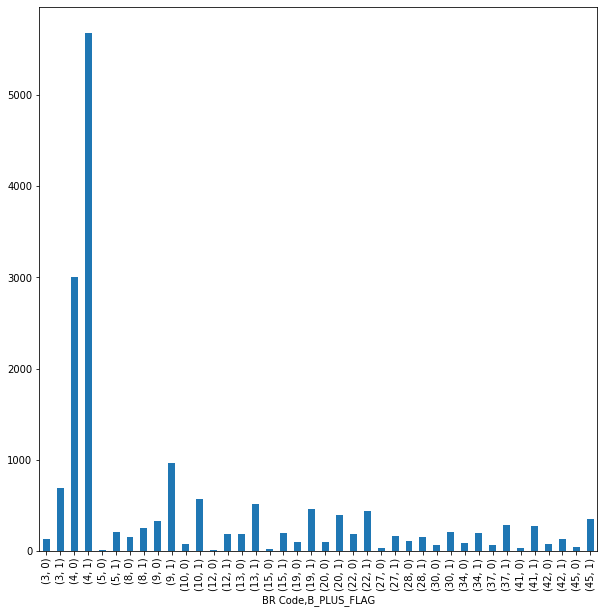

In [15]:
data.groupby(['BR Code', 'B_PLUS_FLAG']).size().plot(kind = 'bar', figsize = (10,10))

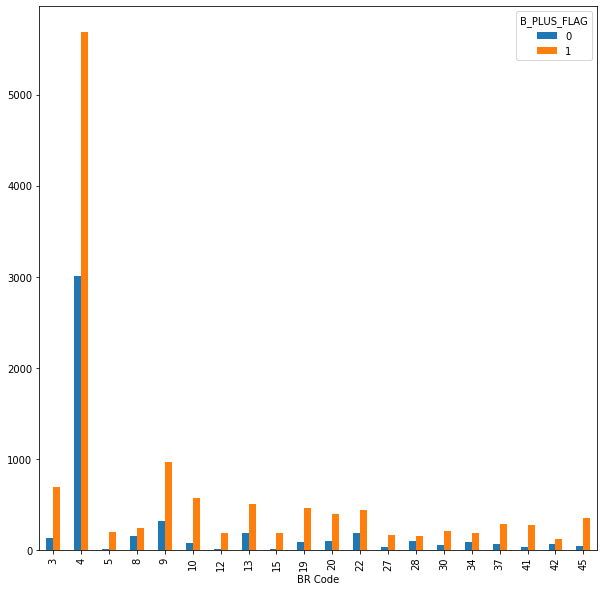

In [16]:
data.groupby(['BR Code', 'B_PLUS_FLAG']).B_PLUS_FLAG.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

Industry codes such as 5,10,12,15,27,30 have strong affinity to 1

Analyzing top 5 industry codes which have the most records i.e. accounts for 55% of the data

In [17]:
top_5_br = data_left[data_left['BR Code'].isin([4,9,3,13,10])]
top_5_br['Debt2cap_quantile'] = pd.qcut(top_5_br['DEBT2CAPT_Y0'], 4, labels = False)
top_5_br['Debt2equity_quantile'] = pd.qcut(top_5_br['DEBT2EQUITY_Y0'], 4, labels = False)
top_5_br['Cash2asset_quantile'] = pd.qcut(top_5_br['CASH2ASSET_Y0'], 4, labels = False)
top_5_br['Debt2asset_quantile'] = pd.qcut(top_5_br['DEBT2ASSET_Y0'], 4, labels = False)

C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Looking at relation between industry codes and cash2asset

In [18]:
top_5_br.groupby(['BR Code', 'Cash2asset_quantile']).size()

BR Code  Cash2asset_quantile
3        0                       554
         1                       195
         2                        56
         3                        20
4        0                       970
         1                      2201
         2                      2696
         3                      2823
9        0                       809
         1                       272
         2                       134
         3                        74
10       0                       487
         1                       105
         2                        38
         3                        15
13       0                       215
         1                       262
         2                       111
         3                       103
dtype: int64

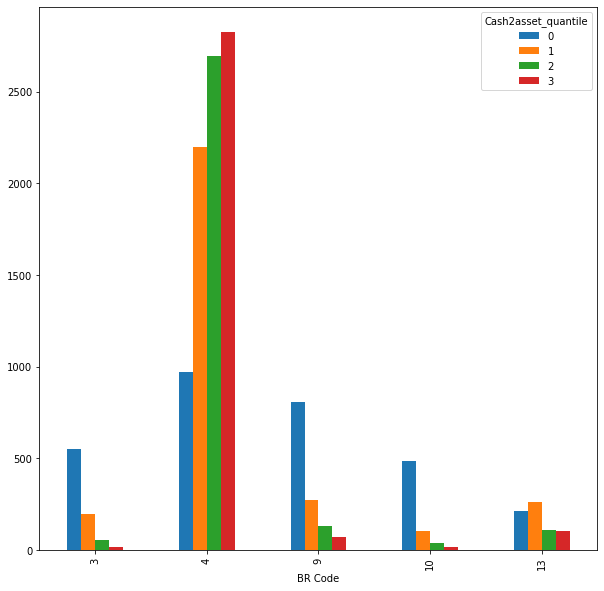

In [19]:
top_5_br.groupby(['BR Code', 'Cash2asset_quantile']).Cash2asset_quantile.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

Industry code 4 have majority of records in the higher quantiles of Cash2Asset whereas the remaining have it in the lower quantiles

Looking at relation between industry codes and Debt2Equity

In [20]:
top_5_br.groupby(['BR Code', 'Debt2equity_quantile']).size()

BR Code  Debt2equity_quantile
3        0                        446
         1                        112
         2                         98
         3                        169
4        0                       1510
         1                       2527
         2                       2556
         3                       2097
9        0                        558
         1                        177
         2                        174
         3                        380
10       0                        370
         1                         67
         2                         56
         3                        152
13       0                        151
         1                        152
         2                        151
         3                        237
dtype: int64

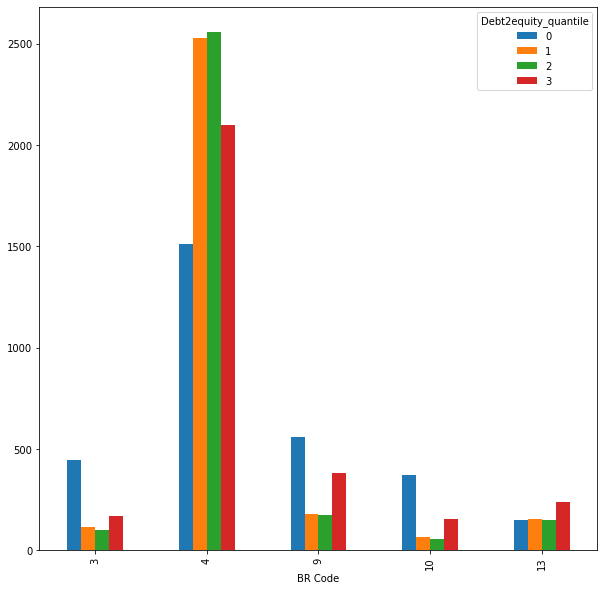

In [21]:
top_5_br.groupby(['BR Code', 'Debt2equity_quantile']).Debt2equity_quantile.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

Industry codes 3 and 9 have majority of its companies in the lower quantiles of debt2equity whereas industry codes 4 and 13 have majority of companies in the higher quantiles of debt2equity

Looking at relation between industry codes and Debt2Asset

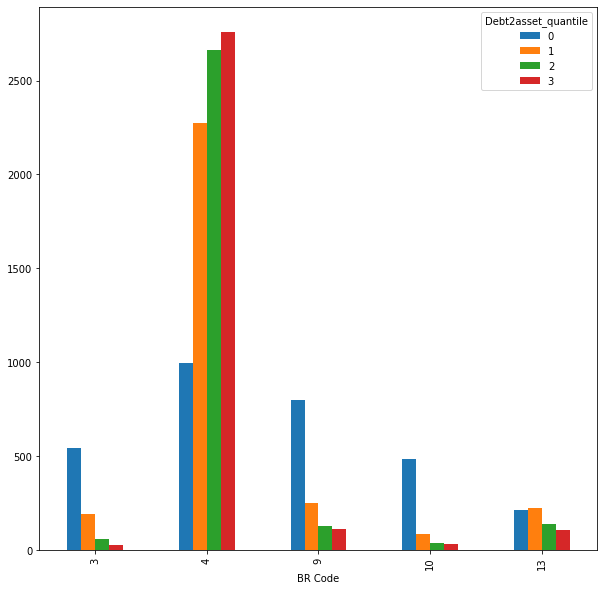

In [22]:
top_5_br.groupby(['BR Code', 'Debt2asset_quantile']).Debt2asset_quantile.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

In [23]:
top_5_br.groupby(['BR Code', 'Debt2asset_quantile']).size()

BR Code  Debt2asset_quantile
3        0                       542
         1                       195
         2                        62
         3                        26
4        0                       995
         1                      2276
         2                      2663
         3                      2756
9        0                       799
         1                       249
         2                       130
         3                       111
10       0                       486
         1                        88
         2                        38
         3                        33
13       0                       213
         1                       227
         2                       142
         3                       109
dtype: int64

Industry codes 3,9,10 and 13 have majority of its companies in lower quantiles of debt2asset ratio whereas 4 has the opposite

Looking at relation between industry codes and TotalRevenue3YearAverage

In [25]:
top_5_br['TOTALREVENUE_3YearAverage_quantile'] = pd.qcut(top_5_br['TOTALREVENUE_3YearAverage'], 4, labels = False)
top_5_br.groupby(['BR Code', 'TOTALREVENUE_3YearAverage_quantile']).size()

C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


BR Code  TOTALREVENUE_3YearAverage_quantile
3        0                                       17
         1                                       67
         2                                      212
         3                                      529
4        0                                     2858
         1                                     2738
         2                                     2170
         3                                      924
9        0                                       78
         1                                      103
         2                                      229
         3                                      879
10       0                                       28
         1                                       22
         2                                      148
         3                                      447
13       0                                       54
         1                                      105
         2          

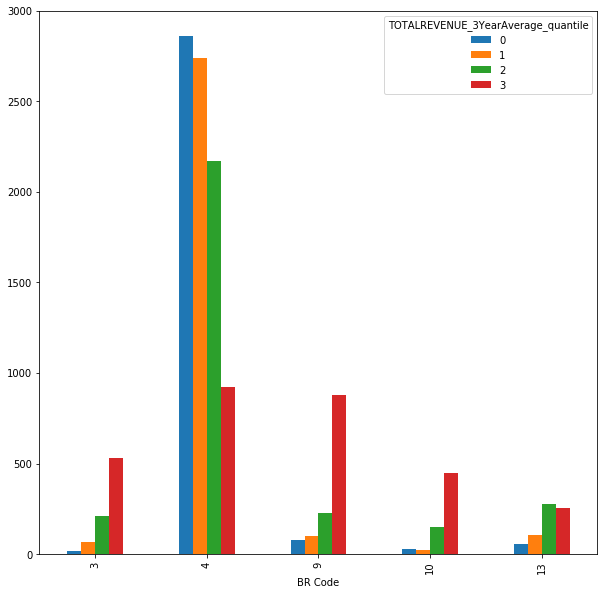

In [26]:
top_5_br.groupby(['BR Code', 'TOTALREVENUE_3YearAverage_quantile']).TOTALREVENUE_3YearAverage_quantile.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

Majority of companies in these 5 industry codes are in the higher quantiles of TotalRevenue_3YearAverage except for industry code 4

Looking at relation between industry codes and TotalAssets3YearAverage

In [28]:
top_5_br['TOTALASSET_3YearAverage_quantile'] = pd.qcut(top_5_br['TOTALASSET_3YearAverage'], 4, labels = False)
top_5_br.groupby(['BR Code', 'TOTALASSET_3YearAverage_quantile']).size()

C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


BR Code  TOTALASSET_3YearAverage_quantile
3        0                                     14
         1                                     53
         2                                    203
         3                                    555
4        0                                   2852
         1                                   2728
         2                                   2148
         3                                    962
9        0                                     67
         1                                    122
         2                                    295
         3                                    805
10       0                                     19
         1                                     21
         2                                    116
         3                                    489
13       0                                     83
         1                                    111
         2                                    273
        

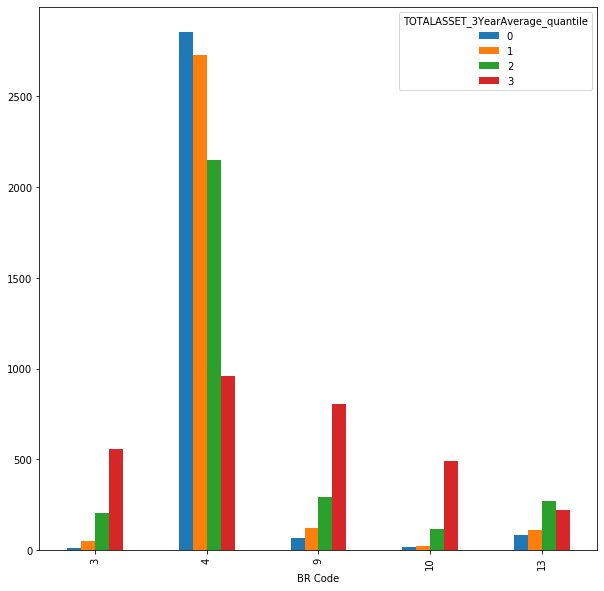

In [29]:
top_5_br.groupby(['BR Code', 'TOTALASSET_3YearAverage_quantile']).TOTALASSET_3YearAverage_quantile.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

Majority of companies in these 5 industry codes are in the higher quantiles of TotalAsset_3YearAverage except for industry code 4

In [30]:
data_left['Revenue_increase']=np.where(data_left['TOTALREVENUE_Y0'] > data_left['TOTALREVENUE_Y1'], 'Y','N')
data_left.groupby(['B_PLUS_FLAG', 'Revenue_increase']).size()

B_PLUS_FLAG  Revenue_increase
0            N                   2953
             Y                   2558
1            N                   7008
             Y                   9427
dtype: int64

Relation between revenue increase and Final_IG

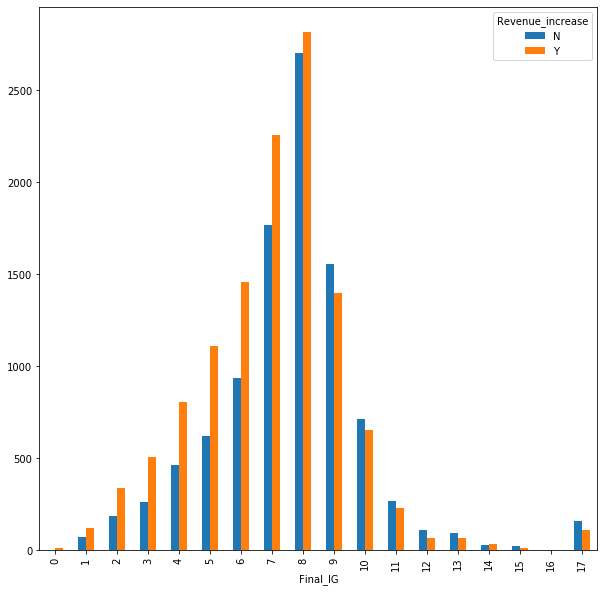

In [31]:
data_left.groupby(['Final_IG', 'Revenue_increase']).Revenue_increase.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

In [32]:
data_left.groupby(['Final_IG', 'Revenue_increase']).size()

Final_IG  Revenue_increase
0         N                      3
          Y                      9
1         N                     69
          Y                    123
2         N                    186
          Y                    336
3         N                    261
          Y                    508
4         N                    463
          Y                    808
5         N                    619
          Y                   1111
6         N                    937
          Y                   1459
7         N                   1766
          Y                   2258
8         N                   2704
          Y                   2815
9         N                   1557
          Y                   1396
10        N                    715
          Y                    652
11        N                    269
          Y                    229
12        N                    111
          Y                     65
13        N                     95
          Y                 

Till rating 8, revenue increase is a indicator for higher rating after which there is diminishing returns

Relation between Asset increase and Final_IG

In [34]:
data_left['Asset_increase']=np.where(data_left['TOTALASSET_Y0'] > data_left['TOTALASSET_Y1'], 'Y','N')
data_left.groupby(['Final_IG', 'Asset_increase']).size()

Final_IG  Asset_increase
0         N                    1
          Y                   11
1         N                   78
          Y                  114
2         N                  177
          Y                  345
3         N                  268
          Y                  501
4         N                  427
          Y                  844
5         N                  633
          Y                 1097
6         N                  970
          Y                 1426
7         N                 1776
          Y                 2248
8         N                 2702
          Y                 2817
9         N                 1507
          Y                 1446
10        N                  714
          Y                  653
11        N                  260
          Y                  238
12        N                   98
          Y                   78
13        N                  101
          Y                   61
14        N                   30
          Y       

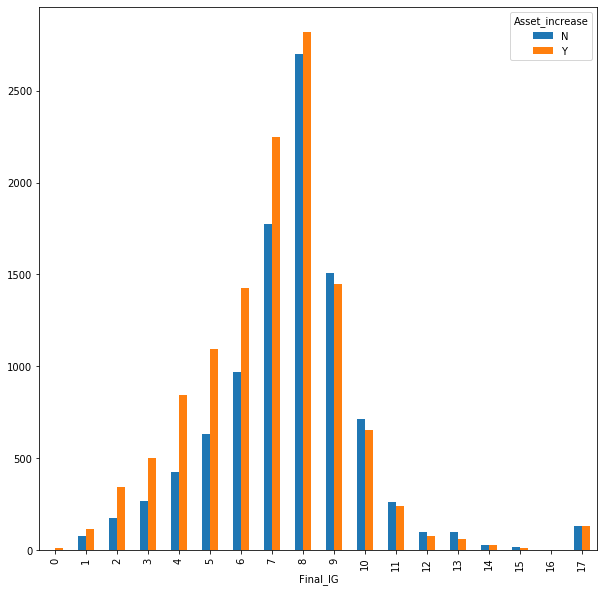

In [35]:
data_left.groupby(['Final_IG', 'Asset_increase']).Asset_increase.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

Diminishing returns after rating 8

Relation between debt decrease and final_IG

In [36]:
data_left['Debt_decrease']=np.where(data_left['TOTALDEBT_Y0'] < data_left['TOTALDEBT_Y1'], 'Y','N')
data_left.groupby(['Final_IG', 'Debt_decrease']).size()

Final_IG  Debt_decrease
0         N                   7
          Y                   5
1         N                 123
          Y                  69
2         N                 331
          Y                 191
3         N                 459
          Y                 310
4         N                 729
          Y                 542
5         N                 994
          Y                 736
6         N                1345
          Y                1051
7         N                2265
          Y                1759
8         N                3124
          Y                2395
9         N                1678
          Y                1275
10        N                 758
          Y                 609
11        N                 260
          Y                 238
12        N                  73
          Y                 103
13        N                  82
          Y                  80
14        N                  31
          Y                  28
15        N     

Decrease in debt seems not a strong indictor for the rating

relation between net_profit increase and Final_IG

In [37]:
data_left['profit_increase']=np.where(data_left['NETPROFIT_Y0'] > data_left['NETPROFIT_Y1'], 'Y','N')
data_left.groupby(['Final_IG', 'profit_increase']).size()

Final_IG  profit_increase
0         N                     3
          Y                     9
1         N                    84
          Y                   108
2         N                   228
          Y                   294
3         N                   352
          Y                   417
4         N                   580
          Y                   691
5         N                   835
          Y                   895
6         N                  1181
          Y                  1215
7         N                  2111
          Y                  1913
8         N                  2993
          Y                  2526
9         N                  1627
          Y                  1326
10        N                   764
          Y                   603
11        N                   288
          Y                   210
12        N                    96
          Y                    80
13        N                    87
          Y                    75
14        N           

Diminishing returns after rating 6

In [38]:
data_left['equity_increase']=np.where(data_left['TOTALEQUITY_Y0'] > data_left['TOTALEQUITY_Y1'], 'Y','N')
data_left.groupby(['Final_IG', 'equity_increase']).size()

Final_IG  equity_increase
0         N                     4
          Y                     8
1         N                    62
          Y                   130
2         N                   177
          Y                   345
3         N                   240
          Y                   529
4         N                   417
          Y                   854
5         N                   656
          Y                  1074
6         N                   985
          Y                  1411
7         N                  1892
          Y                  2132
8         N                  2818
          Y                  2701
9         N                  1568
          Y                  1385
10        N                   726
          Y                   641
11        N                   290
          Y                   208
12        N                    84
          Y                    92
13        N                    94
          Y                    68
14        N           

Diminishing returns after rating 7

Relation between debt2equity decrease and Final_IG

In [40]:
data_left['debt2equity_decrease']=np.where(data_left['DEBT2EQUITY_Y0'] < data_left['DEBT2EQUITY_Y1'], 'Y','N')
data_left.groupby(['Final_IG', 'debt2equity_decrease']).size()

Final_IG  debt2equity_decrease
0         N                          6
          Y                          6
1         N                        100
          Y                         92
2         N                        253
          Y                        269
3         N                        364
          Y                        405
4         N                        580
          Y                        691
5         N                        874
          Y                        856
6         N                       1170
          Y                       1226
7         N                       2091
          Y                       1933
8         N                       2991
          Y                       2528
9         N                       1667
          Y                       1286
10        N                        753
          Y                        614
11        N                        288
          Y                        210
12        N                      

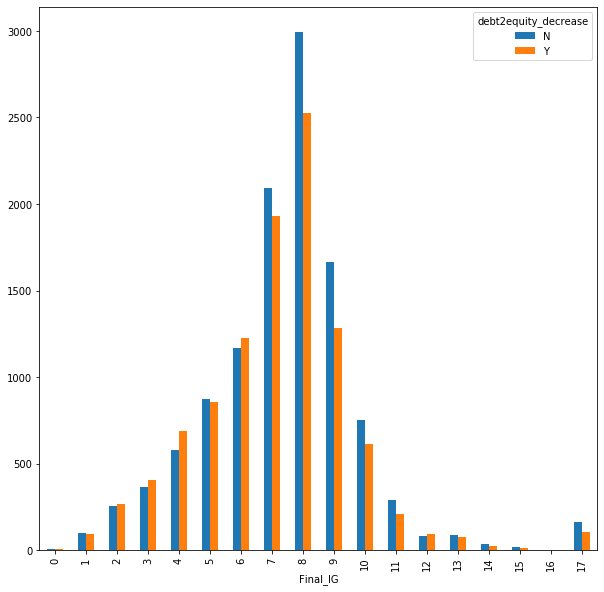

In [41]:
data_left.groupby(['Final_IG', 'debt2equity_decrease']).debt2equity_decrease.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

Diminishing returns after rating 6

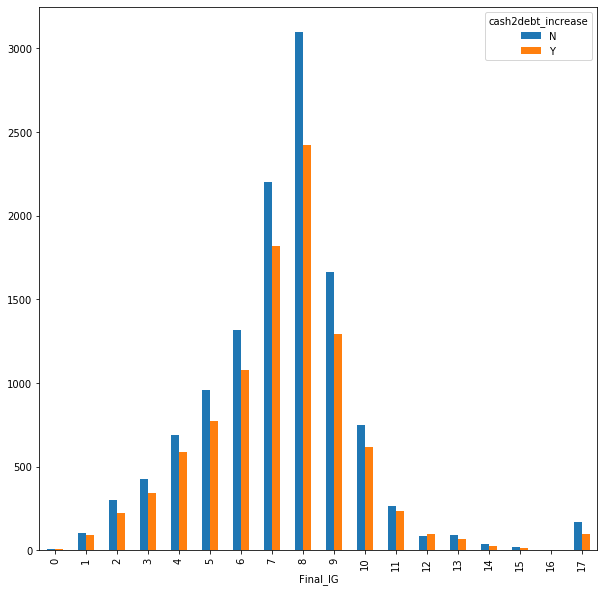

In [44]:
data_left.groupby(['Final_IG', 'cash2debt_increase']).cash2debt_increase.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

In [45]:
data_left['cash2debt_increase']=np.where(data_left['CASH2DEBT_Y0'] > data_left['CASH2DEBT_Y1'], 'Y','N')
data_left.groupby(['Final_IG', 'cash2debt_increase']).size()

Final_IG  cash2debt_increase
0         N                        4
          Y                        8
1         N                      100
          Y                       92
2         N                      298
          Y                      224
3         N                      428
          Y                      341
4         N                      687
          Y                      584
5         N                      958
          Y                      772
6         N                     1319
          Y                     1077
7         N                     2204
          Y                     1820
8         N                     3096
          Y                     2423
9         N                     1663
          Y                     1290
10        N                      749
          Y                      618
11        N                      262
          Y                      236
12        N                       82
          Y                       94
13       

In [46]:
data_left['debt2equity_quantile'] = pd.qcut(data_left['DEBT2EQUITY_Y0'], 4, labels = False)
data_left.groupby(['Final_IG', 'debt2equity_quantile']).size()

Final_IG  debt2equity_quantile
0         0                        12
1         0                       167
          1                         3
          2                         2
          3                        20
                                 ... 
16        1                         2
17        0                        17
          1                        74
          2                        81
          3                        91
Length: 66, dtype: int64